In [1]:
import datetime
import os
from mdagent import MDAgent
import matplotlib.pyplot as plt

In [2]:
prompt24 = "Simulate oxygenated hemoglobin (1A3N) and deoxygenated hemoglobin (6BB5). Then analyze the RDF of both."
llm_var = "gpt-4-turbo-2024-04-09"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-09
time: 21:53:55
LLM:  gpt-4-turbo-2024-04-09 
Temperature:  0.1


In [3]:
agent.run(prompt24)

Thought: To simulate oxygenated hemoglobin (PDB ID: 1A3N) and deoxygenated hemoglobin (PDB ID: 6BB5) and analyze the radial distribution function (RDF) of both, I need to first set up and run molecular dynamics simulations for each structure. After the simulations, I can then compute the RDF for each.

Action:
```json
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1A3N",
        "forcefield_files": ["amber99sb.xml", "tip3p.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1.0 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "solvate": true
        },
        "integrator_params": {
            "integrator_type": "LangevinMiddle",
            "Temperature": "300 * kelvin",
            "Friction": "1.0 / picoseconds",
            "Timestep": "0.002 * picoseconds"
        },
        "simulation_params": {
            "Ensemble": "NVT",
            "Number of

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

In [4]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-09
time: 22:18:54
Files found in registry: 1A3N_215416: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_215416
 1A3N_215445: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_215453: Initial positions for simulation sim0_215453
 sim0_215453: Basic Simulation of Protein 1A3N_215445
 rec0_215503: Simulation trajectory for protein 1A3N_215445 and simulation sim0_215453
 rec1_215503: Simulation state log for protein 1A3N_215445 and simulation sim0_215453
 rec2_215503: Simulation pdb frames for protein 1A3N_215445 and simulation sim0_215453
 6BB5_220455: PDB file downloaded from RSCB
 PDBFile ID: 6BB5_220455
 6BB5_220502: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_220509: Initial positions for simulation sim

In [5]:
path_oxygenated = registry.get_mapped_path("fig0_221845")
# path_deoxygenated = registry.get_mapped_path("fig0_221845")
assert os.path.exists(path_oxygenated), 'Path not found'
# assert os.path.exists(path_deoxygenated), 'Path not found'
# assert path_oxygenated != path_deoxygenated, 'Paths are the same'

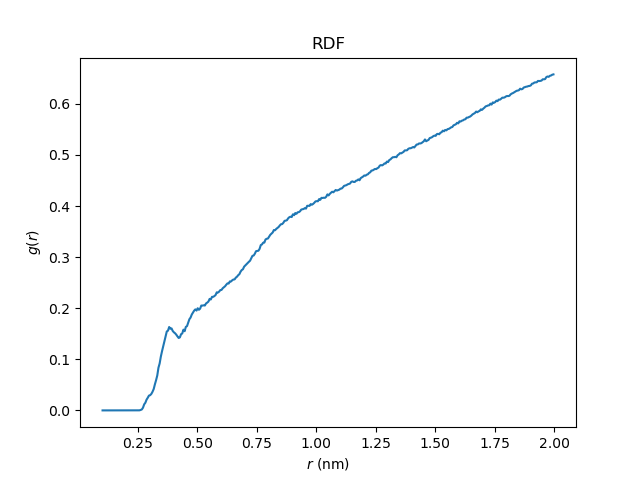

In [6]:
from IPython.display import Image
Image(filename=path_oxygenated)

In [ ]:
# Image(filename=path_deoxygenated)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ❌
### No Hallucination ✅
### Logic make sense ✅
### Correct Answer  ❌
### Number of steps completed: 5
### % steps completed: 83.33%

Hallucinated the whole chain --  all tools names and observations. 